# AlexNet

* It is a CNN architecture.
* It contains 8 layers.
* 5 convolutional layers - Conv2D()
* A few subsampling and normalization layers.
* 3 fully connected layers - Dense()

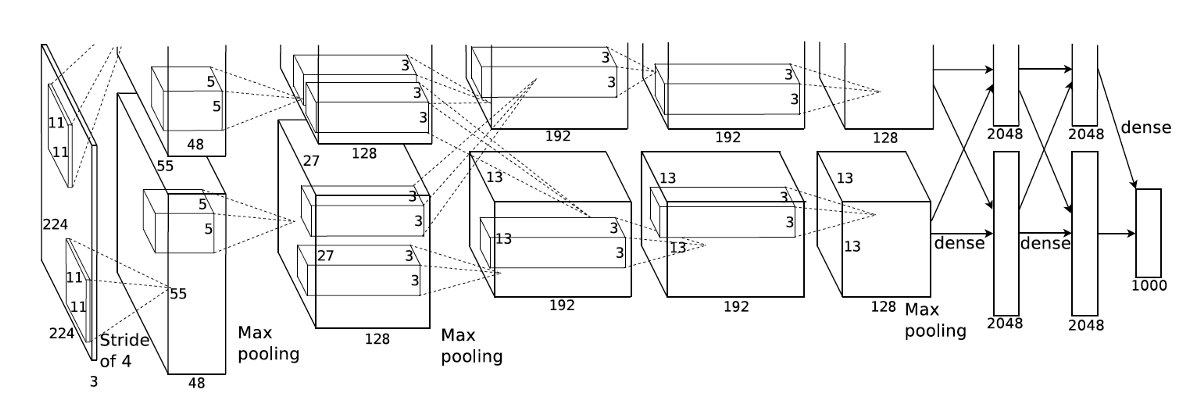

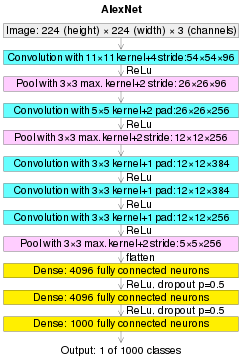

### Import the required packages:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

### Getting the dataset:

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

### Adding some padding to the images: 

In [3]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

### Expanding the dimensions of the image:

In [4]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

### Repeating the elements: (**~OPTIONAL**)
Here each element is repeated 3 times.

In [5]:
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

### Splitting the data for the validation set:

In [6]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

### Creating the model:

In [7]:
model = models.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224,
                                               interpolation="bilinear",
                                               input_shape=x_train.shape[1:]),
    layers.Conv2D(96, 11, strides=4, padding='same'),
    layers.Lambda(tf.nn.local_response_normalization),
    
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    layers.Conv2D(256, 5, strides=4, padding='same'),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    layers.Conv2D(384, 3, strides=4, padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(384, 3, strides=4, padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(256, 3, strides=4, padding='same'),
    layers.Activation('relu'),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
    

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [8]:
model.compile(optimizer='adam', 
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

### Training the model:

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
907/907 [==============================] - 118s 120ms/step - loss: 0.4821 - accuracy: 0.8301 - val_loss: 0.0832 - val_accuracy: 0.9760
Epoch 2/10
907/907 [==============================] - 108s 119ms/step - loss: 0.0974 - accuracy: 0.9741 - val_loss: 0.0474 - val_accuracy: 0.9900
Epoch 3/10
907/907 [==============================] - 108s 119ms/step - loss: 0.0759 - accuracy: 0.9804 - val_loss: 0.0448 - val_accuracy: 0.9890
Epoch 4/10
907/907 [==============================] - 108s 119ms/step - loss: 0.0633 - accuracy: 0.9842 - val_loss: 0.0492 - val_accuracy: 0.9895
Epoch 5/10
907/907 [==============================] - 108s 119ms/step - loss: 0.0530 - accuracy: 0.9857 - val_loss: 0.0482 - val_accuracy: 0.9920
Epoch 6/10
907/907 [==============================] - 107s 118ms/step - loss: 0.0422 - accuracy: 0.9894 - val_loss: 0.0854 - val_accuracy: 0.9900
Epoch 7/10
907/907 [==============================] - 108s 119ms/step - loss: 0.0422 - accuracy: 0.9894 - val_loss: 0.0515 -

### Plotting accuracy and losses:

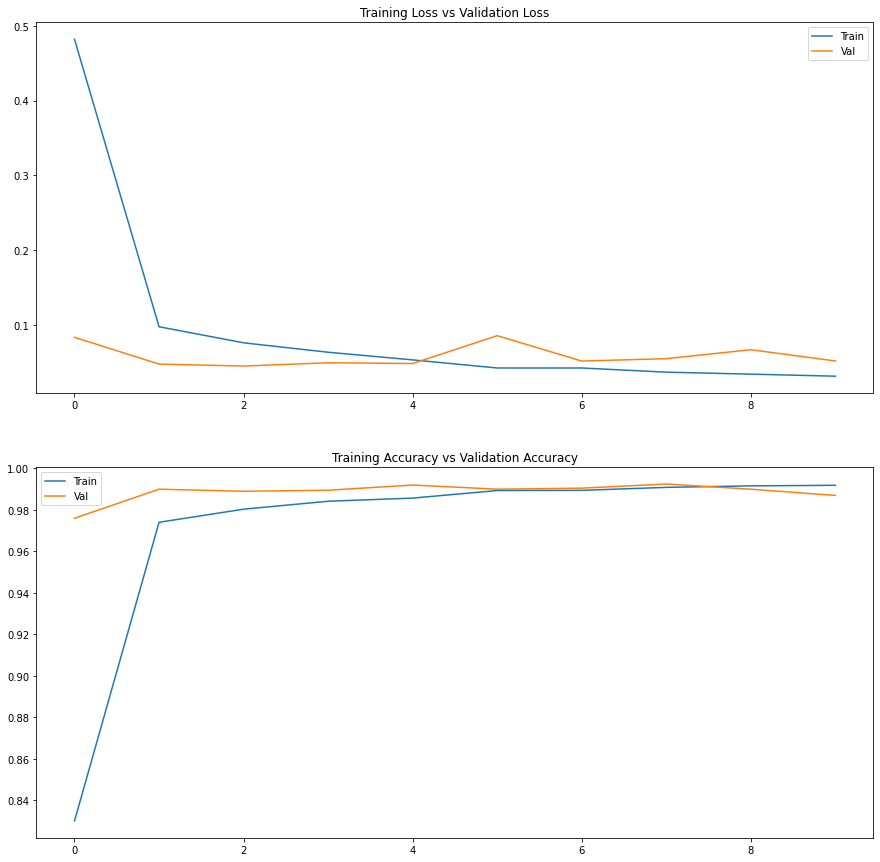

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

### Printing the metrics:

In [11]:
results = model.evaluate(x_test, y_test)
print("Loss = {}, Accuray = {}".format(results[0], results[1]))

313/313 [==============================] - 7s 22ms/step - loss: 0.0558 - accuracy: 0.9853
Loss = 0.055781181901693344, Accuray = 0.9853000044822693
